In [84]:
! chmod 600 /content/kaggle.json

In [85]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d aprabowo/indonesia-tourism-destination

  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 69.3MB/s]


In [86]:
!unzip /content/indonesia-tourism-destination.zip

Archive:  /content/indonesia-tourism-destination.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


In [87]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Melakukan import library yang akan digunakan pada model

kita buat variable dengan nama df 

In [88]:
df = pd.read_csv('/content/tourism_rating.csv')
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


Data rating memiliki 10000 baris dan 3 kolom

In [89]:
# Mengubah User_Id menjadi list tanpa nilai yang sama
user_ids = df['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)
     
# Melakukan encoding User_Id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)
     
# Melakukan proses encoding angka ke ke User_Id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_Id: ', user_encoded_to_user)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

Kita telah mengubah fitur User_Id ke dalam indeks integer 

In [90]:
# Mengubah Place_Id menjadi list tanpa nilai yang sama
tourism_ids = df['Place_Id'].unique().tolist()
     
# Melakukan proses encoding Place_Id
tourism_to_tourism_encoded = {x: i for i, x in enumerate(tourism_ids)}
     
# Melakukan proses encoding angka ke Place_Id
tourism_encoded_to_tourism = {i: x for i, x in enumerate(tourism_ids)}

Kita telah mengubah fitur Place_Id ke dalam indeks integer 

In [91]:
# Mapping User_Id ke dataframe user
df['user'] = df['User_Id'].map(user_to_user_encoded)
     
# Mapping Place_Id ke dataframe tourism
df['tourism'] = df['Place_Id'].map(tourism_to_tourism_encoded)

Kita telah memetakan User_Id dan Place_Id ke dataframe yang berkaitan

In [92]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
     
# Mendapatkan jumlah tourism
num_tourism = len(tourism_encoded_to_tourism)
print(num_tourism)
 
# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
     
# Nilai minimum rating
min_rating = min(df['Place_Ratings'])
     
# Nilai maksimal rating
max_rating = max(df['Place_Ratings'])
     
print('Number of User: {}, Number of Tourism: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_tourism, min_rating, max_rating
))

300
437
Number of User: 300, Number of Tourism: 437, Min Rating: 1.0, Max Rating: 5.0


Berdasarkan data di atas terdapat 300 jumlah user, 437 jumlah Tourism, dan mengubah nilai rating menjadi float

In [93]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,tourism
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


Dapat kita lihat bahwa data pada tabel di atas telah di acak 

In [94]:
# Membuat variabel x untuk mencocokkan data user dan tourism menjadi satu value
x = df[['user', 'tourism']].values
     
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
     
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
     
print(x, y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


Kita telah membagi data train dan validasi dengan komposisi 80:20

In [95]:
class RecommenderNet(tf.keras.Model):

  # insialisasi fungsi
  def __init__(self, num_users, num_tourism, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_tourism = num_tourism
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.tourism_embedding = layers.Embedding( # layer embeddings resto
        num_tourism,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.tourism_bias = layers.Embedding(num_tourism, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    tourism_vector = self.tourism_embedding(inputs[:, 1]) # memanggil layer embedding 3
    tourism_bias = self.tourism_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_tourism = tf.tensordot(user_vector, tourism_vector, 2) 
 
    x = dot_user_tourism + user_bias + tourism_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Membuat class RecommenderNet dengan keras Model class

In [96]:
model = RecommenderNet(num_users, num_tourism, 50) #inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam(Adaptive Moment Estimation) sebagai optimizer, dan root mean squeared error(RMSE) sebagai metrics evalution.

In [97]:
# Memulai training
     
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 [==============================] - 3s 2ms/step - loss: 0.6942 - root_mean_squared_error: 0.3461 - val_loss: 0.6933 - val_root_mean_squared_error: 0.3451
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6866 - root_mean_squared_error: 0.3405 - val_loss: 0.6939 - val_root_mean_squared_error: 0.3455
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6813 - root_mean_squared_error: 0.3367 - val_loss: 0.6949 - val_root_mean_squared_error: 0.3462
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6769 - root_mean_squared_error: 0.3335 - val_loss: 0.6955 - val_root_mean_squared_error: 0.3466
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6713 - root_mean_squared_error: 0.3293 - val_loss: 0.6969 - val_root_mean_squared_error: 0.3475
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6684 - root_mean_squared_error: 0.3272 - val_l

Proses training dilakukan dengan 100 epoch

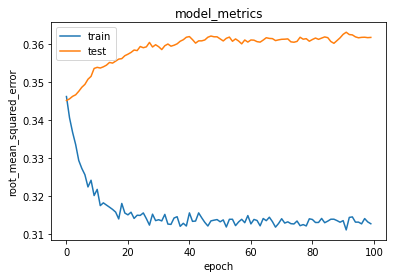

In [98]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dari proses ini, kita memperoleh nilai error pada data training akhir sebesar sekitar 0.315 dan error pada data validasi sebesar 0.36. Nilai tersebut cukup bagus untuk sistem rekomendasi.

In [101]:
tourism_df = pd.read_csv('/content/tourism_with_id.csv')
df = pd.read_csv('/content/tourism_rating.csv')

# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
tourism_visited_by_user = df[df.User_Id == user_id]

# Operator bitwise (~), bisa diketetahu di sini  https://docs.python.org/3/reference/expressions.html 
tourism_not_visited = tourism_df[~tourism_df['Place_Id'].isin(tourism_visited_by_user.Place_Id.values)]['Place_Id'] 
tourism_not_visited = list(
    set(tourism_not_visited)
    .intersection(set(tourism_to_tourism_encoded.keys()))
)

tourism_not_visited = [[tourism_to_tourism_encoded.get(x)] for x in tourism_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(tourism_not_visited), tourism_not_visited)
)

kita telah membuat varibale tourism_not_visited sebagai daftar pariwisata untuk direkomendasikan pada pnegguna

In [112]:
ratings = model.predict(user_resto_array).flatten()
     
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_tourism_ids = [
    tourism_encoded_to_tourism.get(tourism_not_visited[x][0]) for x in top_ratings_indices
]
     
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Tourism with high ratings from user')
print('----' * 8)
     
top_tourism_user = (
    tourism_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
     
tourism_df_rows = tourism_df[tourism_df['Place_Id'].isin(top_tourism_user)]
for row in tourism_df_rows.itertuples():
    print(row.Place_Name, ':', row.Category)
     
print('----' * 8)
print('Top 10 resto recommendation')
print('----' * 8)
     
recommended_tourism = tourism_df[tourism_df['Place_Id'].isin(recommended_resto_ids)]
for row in recommended_tourism.itertuples():
  print(row.Place_Name, ':', row.Category)

Showing recommendations for users: 154
Tourism with high ratings from user
--------------------------------
Waterboom PIK (Pantai Indah Kapuk) : Taman Hiburan
Pantai Baron : Bahari
Green Village Gedangsari : Taman Hiburan
Pantai Congot : Bahari
Gunung Lalakon : Cagar Alam
--------------------------------
Top 10 resto recommendation
--------------------------------
Skyrink - Mall Taman Anggrek : Taman Hiburan
Bumi Perkemahan Cibubur : Taman Hiburan
Galeri Nasional Indonesia : Budaya
Monumen Selamat Datang : Budaya
Taman Situ Lembang : Taman Hiburan
Jakarta Planetarium : Taman Hiburan
Kampung Cina : Budaya
Rumah Sipitung : Budaya
Museum Tekstil : Budaya
Bukit Moko : Cagar Alam


Rekomendasi untuk user dengan id 154.kita memperoleh 4 rekomendasi pariwisata dengan kategori Taman Hiburan, dan 1 pariwisata dengan kategori Cagar Alam.